# Imports

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Helper Functions

In [24]:

# Function to visualize random samples from the dataset
def visualize_samples(dataset, num_samples=8):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        idx = np.random.randint(len(dataset))
        sample, label = dataset[idx]
        axes[i].imshow(np.transpose(sample.numpy(), (1, 2, 0)))
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.show()

# Function to visualize one batch from the data loader
def visualize_batch(dataloader, num_images_per_row = 5):
    images,labels = next(iter(dataloader))
    


    num_rows = len(images) // num_images_per_row
    if len(images) % num_images_per_row != 0:
        num_rows += 1

    fig, axes = plt.subplots(num_rows, num_images_per_row, figsize=(15, 3 * num_rows))

    for i in range(num_rows):
        for j in range(num_images_per_row):
            index = i * num_images_per_row + j
            if index < len(images):
                axes[i, j].imshow(np.transpose(images[index].numpy(), (1, 2, 0)))
                axes[i, j].set_title(f"Label: {labels[index].item()}")
                axes[i, j].axis('off')
            else:
                axes[i, j].axis('off')

    plt.show()



# Dataloader

In [7]:
class CustomDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.data_dir =img_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        img_path = os.path.join(self.data_dir, self.data.iloc[index, 0])
        image = Image.open(img_path).convert("RGB")
        label = self.data.iloc[index, 1]
        if self.transform:
            image = self.transform(image)

        return image, label

# Transforms & Augmentation

In [8]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Testing Dataset and dataloader

In [16]:
csv_path = '/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/Assignments/Assignment3/599_DL_A3/data/train.csv'
data_p = '/Users/alijohnnaqvi/Desktop/Fall23/DeepLearning/Assignments/Assignment3/599_DL_A3/data'
train_dataset = CustomDataset(csv_path, data_p, transform)

In [28]:
print(train_dataset.__len__())
sample, label_s = train_dataset.__getitem__(5)
sample.size()


4135


torch.Size([3, 256, 256])

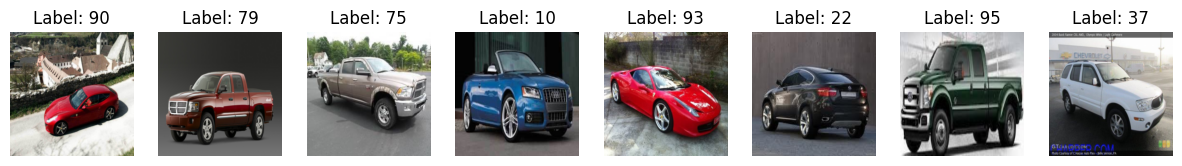

In [18]:
visualize_samples(dataset=train_dataset)

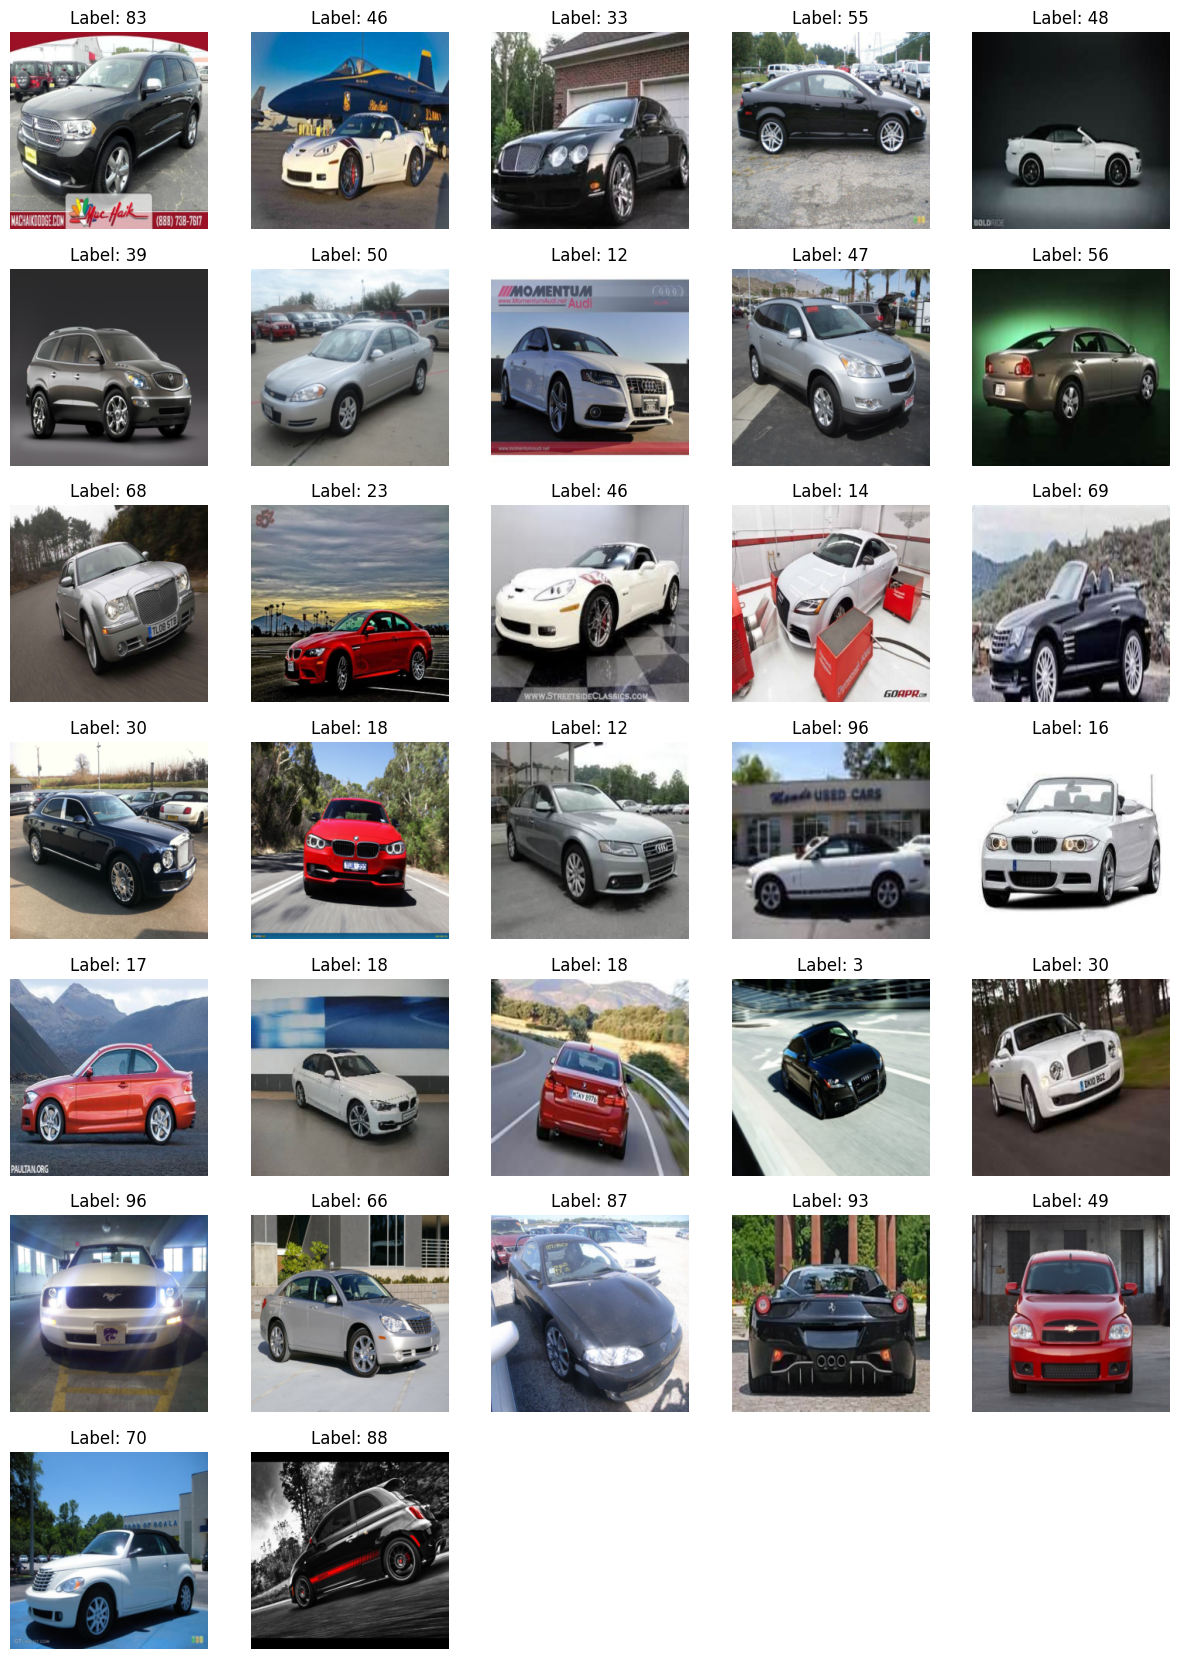

In [25]:
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
visualize_batch(train_dataloader)

# Model Architecture

In [29]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 56 * 56, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


model = SimpleCNN(num_classes=102)  

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



# Training loop

In [ ]:
avgsize = Average image size (test): [672.68848039 465.21397059]
Average image size (train): [667.46674728 461.86674728]